<a href="https://colab.research.google.com/github/blarghwtfbbq/Capstone-_SpaceX/blob/main/SpaceX_Machine_Learning_Prediction_Part_5_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [2]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn

We will import the following libraries for the lab


In [3]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [4]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

## Load the dataframe


Load the data


In [5]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

In [6]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [7]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [10]:
import pandas as pd

# Load the data from local files
data = pd.read_csv("/content/dataset_part_2.csv")
X = pd.read_csv("/content/dataset_part_3.csv")

# Display the first few rows of both DataFrames
print(data.head())
print(X.head())

# Convert 'Class' column to a NumPy array
Y = data['Class'].to_numpy()

# Print the resulting NumPy array
print(Y)


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [11]:
# students get this
transform = preprocessing.StandardScaler()

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'data' and 'X' are already loaded and preprocessed
# data = pd.read_csv("path/to/your/local/dataset_part_2.csv")
# X = pd.read_csv("path/to/your/local/dataset_part_3.csv")

# Convert 'Class' column to a NumPy array
Y = data['Class'].to_numpy()

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verify the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (72, 83)
X_test shape: (18, 83)
Y_train shape: (72,)
Y_test shape: (18,)


we can see we only have 18 test samples.


In [13]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [12]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [13]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid with different solvers and increased max_iter
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear']}
logreg = LogisticRegression(max_iter=2000)  # Increase max_iter to 2000

# Initialize GridSearchCV
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Assuming X_train and Y_train are already defined and preprocessed
logreg_cv.fit(X_train, Y_train)

# Print the best parameters and the accuracy
print("Tuned hyperparameters: (best parameters) ", logreg_cv.best_params_)
print("Accuracy: ", logreg_cv.best_score_)


Tuned hyperparameters: (best parameters)  {'C': 1, 'solver': 'liblinear'}
Accuracy:  0.8190476190476191


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'solver': 'liblinear'}
accuracy : 0.8190476190476191


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
# Calculate the accuracy on the test data using the best estimator
test_accuracy = logreg_cv.best_estimator_.score(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy: ", test_accuracy)


Test Accuracy:  0.8333333333333334


Lets look at the confusion matrix:


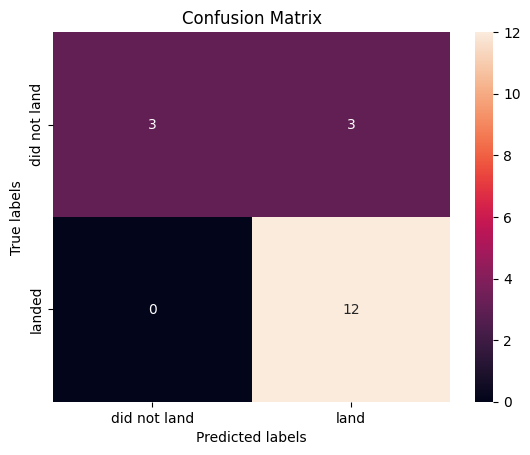

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [ ]:
# Initial Grid Search
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

# Create the SVM object
svm = SVC()

# Create the GridSearchCV object with cv = 10
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Assuming X_train and Y_train are already defined and preprocessed
svm_cv.fit(X_train, Y_train)

# Print the best parameters and the accuracy
print("Tuned hyperparameters: (best parameters) ", svm_cv.best_params_)
print("Accuracy: ", svm_cv.best_score_)


In [18]:
# Modified Grid Search
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define a simplified parameter grid
parameters = {'kernel': ('linear', 'rbf'),
              'C': [0.1, 1, 10],
              'gamma': [0.001, 0.01]}

# Create the SVM object
svm = SVC()

# Create the RandomizedSearchCV object with cv = 10 and parallel computation
svm_cv = RandomizedSearchCV(svm, parameters, n_iter=10, cv=10, n_jobs=-1)

# Fit the RandomizedSearchCV object to find the best parameters
svm_cv.fit(X_train, Y_train)

# Print the best parameters and the accuracy
print("Tuned hyperparameters: (best parameters) ", svm_cv.best_params_)
print("Accuracy: ", svm_cv.best_score_)

# Calculate the accuracy on the test data using the best estimator
test_accuracy = svm_cv.best_estimator_.score(X_test, Y_test)
print("Test Accuracy: ", test_accuracy)


Tuned hyperparameters: (best parameters)  {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
Accuracy:  0.7771428571428571
Test Accuracy:  0.8333333333333334


In [19]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'kernel': 'linear', 'gamma': 0.01, 'C': 1}
accuracy : 0.7771428571428571


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [20]:
# Calculate the accuracy on the test data using the best estimator
test_accuracy = svm_cv.best_estimator_.score(X_test, Y_test)
print("Test Accuracy: ", test_accuracy)


Test Accuracy:  0.8333333333333334


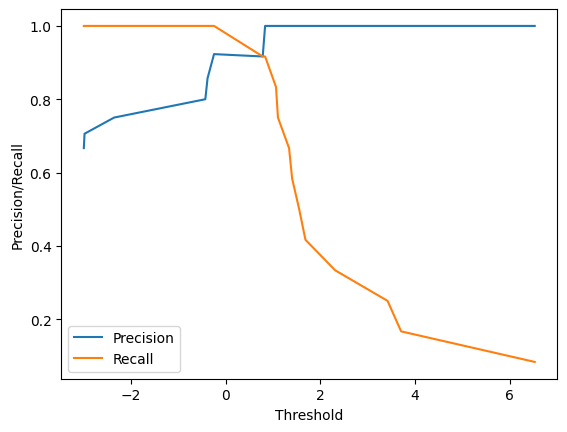

GridSearchCV(cv=10, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01],
                         'kernel': ('linear', 'rbf')})

In [23]:
# LogReg Revision
logreg = LogisticRegression(C=0.1, max_iter=2000, class_weight='balanced')
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, Y_train)

from sklearn.metrics import precision_recall_curve

# Get the decision scores
decision_scores = logreg_cv.decision_function(X_test)

# Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(Y_test, decision_scores)

# Plot precision-recall vs threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

# Choose a new threshold and predict
optimal_threshold = thresholds[np.argmax(precisions + recalls)]
Y_pred_optimal = (decision_scores >= optimal_threshold).astype(int)

svm = SVC(class_weight='balanced')
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)


In [47]:
# Calculate test accuracy for Logistic Regression
logreg_test_accuracy = logreg_cv.best_estimator_.score(X_test, Y_test)
print("Logistic Regression Test Accuracy: ", logreg_test_accuracy)


Logistic Regression Test Accuracy:  0.9444444444444444


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


We can plot the confusion matrix


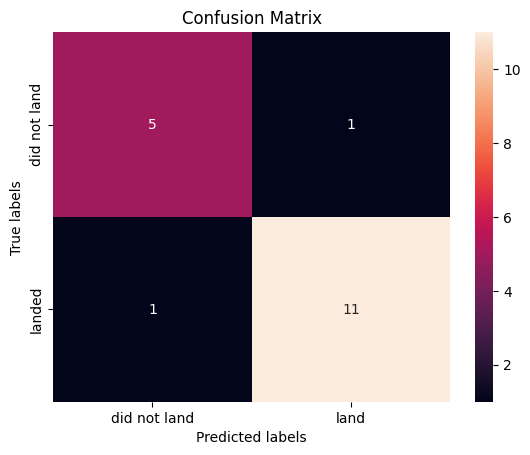

In [24]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [26]:
# Initial Data Tree
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data from local files
data = pd.read_csv("/content/dataset_part_2.csv")
X = pd.read_csv("/content/dataset_part_3.csv")

# Convert 'Class' column to a NumPy array
Y = data['Class'].to_numpy()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Create the Decision Tree Classifier object
tree = DecisionTreeClassifier()

# Create the GridSearchCV object with cv = 10
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Fit the GridSearchCV object to the training data
tree_cv.fit(X_train, Y_train)

# Print the best parameters and the accuracy
print("Tuned hyperparameters: (best parameters) ", tree_cv.best_params_)
print("Accuracy: ", tree_cv.best_score_)


Tuned hyperparameters: (best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy:  0.8732142857142856


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

In [32]:
# Modified Data Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Random Forest classifier
rf = RandomForestClassifier()

# Create the GridSearchCV object with cv = 10
rf_cv = GridSearchCV(rf, param_grid_rf, cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the training data
rf_cv.fit(X_train, Y_train)

# Print the best parameters and the accuracy
print("Tuned hyperparameters: (best parameters) ", rf_cv.best_params_)
print("Accuracy: ", rf_cv.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Tuned hyperparameters: (best parameters)  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy:  0.8607142857142858


In [33]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8732142857142856


In [34]:
# Calculate the accuracy on the test data using the best estimator
test_accuracy = rf_cv.best_estimator_.score(X_test, Y_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.8333333333333334


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [35]:
# Calculate the accuracy on the test data using the best estimator
test_accuracy = tree_cv.best_estimator_.score(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.8333333333333334


We can plot the confusion matrix


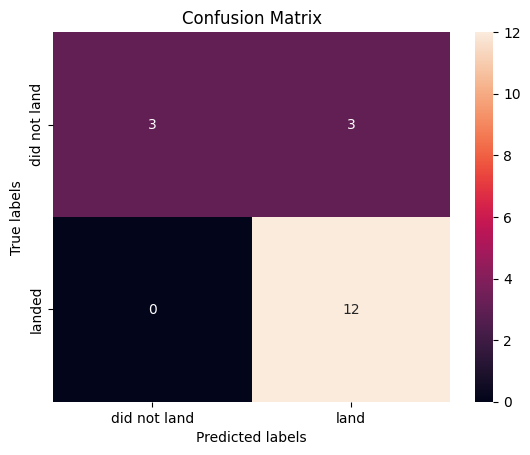

In [37]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [38]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [41]:
# Initial KNN
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your data from local files
data = pd.read_csv("/content/dataset_part_2.csv")
X = pd.read_csv("/content/dataset_part_3.csv")

# Convert 'Class' column to a NumPy array
Y = data['Class'].to_numpy()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Define the parameter grid
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Create the KNN Classifier object
KNN = KNeighborsClassifier()

# Create the GridSearchCV object with cv = 10
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Fit the GridSearchCV object to the training data
knn_cv.fit(X_train, Y_train)

# Print the best parameters and the accuracy
print("Tuned hyperparameters: (best parameters) ", knn_cv.best_params_)
print("Accuracy: ", knn_cv.best_score_)


Tuned hyperparameters: (best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy:  0.8482142857142858


In [42]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [43]:
# Calculate the accuracy on the test data using the best estimator
test_accuracy = knn_cv.best_estimator_.score(X_test, Y_test)

# Print the test accuracy
print("Test Accuracy: ", test_accuracy)


Test Accuracy:  0.8333333333333334


We can plot the confusion matrix


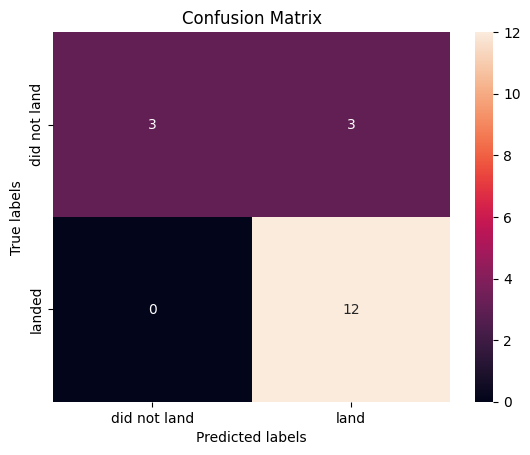

In [44]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [48]:
print("Logistic Regression Test Accuracy: ", logreg_cv.best_estimator_.score(X_test, Y_test))
print("SVM Test Accuracy: ", svm_cv.best_estimator_.score(X_test, Y_test))
print("Decision Tree Test Accuracy: ", tree_cv.best_estimator_.score(X_test, Y_test))
print("KNN Test Accuracy: ", knn_cv.best_estimator_.score(X_test, Y_test))


Logistic Regression Test Accuracy:  0.9444444444444444
SVM Test Accuracy:  0.7222222222222222
Decision Tree Test Accuracy:  0.8333333333333334
KNN Test Accuracy:  0.8333333333333334


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


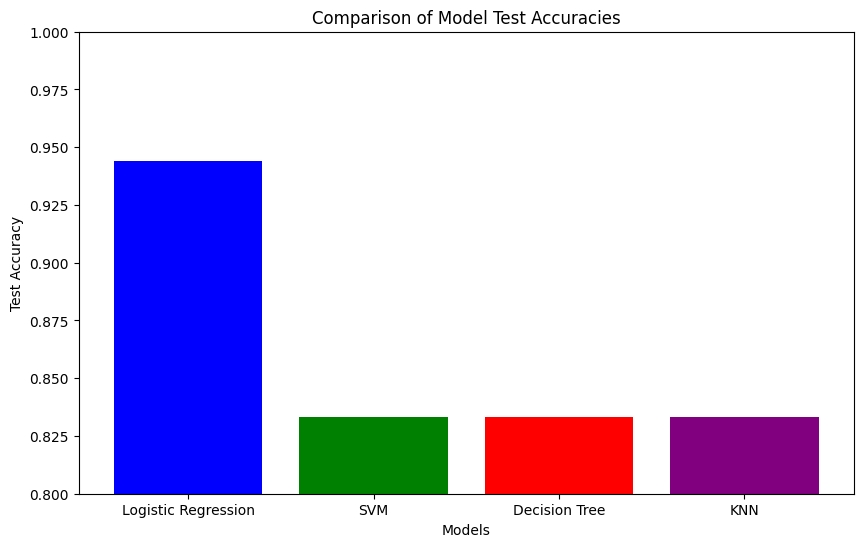

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming these are the accuracies obtained
accuracies = {
    "Logistic Regression": 0.944,
    "SVM": 0.833,
    "Decision Tree": 0.833,  # You need to fill in the actual value if it's different
    "KNN": 0.833
}

# Extract model names and their corresponding accuracies
models = list(accuracies.keys())
scores = list(accuracies.values())

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Comparison of Model Test Accuracies')
plt.ylim([0.8, 1.0])  # Set a y-axis limit for better visualization
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
